<font size="8">**Final Report**

<font size="8">**Introduction**

### What is Diabetes?

Diabetes is a metabolic condition where the body is unable to regulate blood sugar levels effectively (American Diabetes Association, 2013). It is a common disease, with 38.5% of men and 32.8% of women in the US at risk of the condition as reported in the year 2000 (Gray et al., 2015). There exists 2 types of diabetes: Type I and Type II. Type I diabetes affects around 5-10% of those with diabetes and is when the body doesn’t *produce* insulin (a blood sugar regulating hormone) and is therefore unable to regulate blood sugar levels. Type II diabetes is when the body either doesn’t produce *enough* insulin or doesn’t use it effectively and this type accounts for around 90-95% of those diagnosed with diabetes (American Diabetes Association, 2013).

### Diagnosing Diabetes & Question

The standard for diabetes diagnosis is dictated by ones' blood test results that show Hemoglobin A1c (a component of blood) levels ≥ 6.5 (American Diabetes Association (2013), Patel et al., 2023). Interestingly, a study conducted on factors associated with diabetes strongly suggest that Body Mass Index (BMI) is associated with diabetes. The results suggested that those with even moderately higher BMI's are associated with an increased risk of developing diabetes (Gray et al., 2015., Patel et al., 2023). Thus, for this project, we aim to answer the question: **Can we predict a patient's diabetes diagnosis based on their blood glucose level (mg/dL) and BMI (kg/m2)?**
    
### Dataset

The dataset we will be using for this project contains demographic and laboratory variables on African-American patients including height, weight, gender, age, Hemoglobin A1c level, blood pressure etc. The dataset was initially compiled by Mohamadreza Momeni to use for machine learning models in diabetes diagnosis.

### Biases in diabetes literature review

The motivation for using this dataset is to encourage equity in medical research by using data from a racially diverse sample. A 2023 study on the diagnosis of diabetes has found that current literature on the diagnosis of diabetes is biased as a large number of diabetes diagnosis models are based on data collected largely from non-hispanic Whites. This implicates a dangerous overdiagnosis of diabetes among non-hispanic Whites *and* an underdiagnosis of diabetes among non-hispanic Blacks (Cronjé et al., 2023). Thus, we have chosen to conduct our project using this dataset as it consists of African-American participants with the aim of avoiding biases in diagnostic models and equity in healthcare by contributing diverse data within the diabetes literature. 
    
### References

<font size="2">American Diabetes Association. (2013). Diagnosis and Classification of Diabetes Mellitus. *Diabetes Care, 37(1)*, S81–S90. https://doi.org/10.2337/dc14-S081

<font size="2">Cronjé, Héléne T., Katsiferis, Aleandros, Elsenburg, Leonie K., Andersen, Theo O., Rod, Naja H. Varga, Tibor V. (2023). Assessing racial bias in type 2 diabetes risk prediction algorithms. *PLOS Glob Public Health. 2023; 3(5)*, e0001556. https://doi.org/10.1371/journal.pgph.0001556

<font size="2">Gray, Natallia., Picone, Gabriel., Sloan, Frank., Yashkin, Arseniy. (2015). The Relationship between BMI and Onset of Diabetes Mellitus and its Complications. *National Library of Medicine, 108(1), 29-36*. https://doi: 10.14423/SMJ.0000000000000214

<font size="2">Momeni, Mohamadreza. (2023). Diabetes. Version 1 . Retrieved Oct 24, 2023 from https://www.kaggle.com/datasets/imtkaggleteam/diabetes 

<font size="2">Patel, B. J., Mehta, D. N., Vaghani, A., & Patel, K. (2023). Correlation of Body Mass Index (BMI) with Saliva and Blood Glucose Levels in Diabetic and Non-Diabetic Patients. *Journal of pharmacy & bioallied sciences, 15(Suppl 2)*, S1204–S1207. https://doi.org/10.4103/jpbs.jpbs_159_23


<font size="8">**Methods**
    
-- Description of methods -- write this after we've done all the code --

Please run the following cell to load the library packages necessary
    
### References
    
Fehring, Thomas, K., Odum, Susan, M., Griffin, William, L., Mason, Bohannon., McCoy, Thomas H. (2007). The Obesity Epidemic: Its Effect on Total Joint Arthroplasty. *The Journal of Arthroplasty, 22(6)*, 71-76. https://doi.org/10.1016/j.arth.2007.04.014


In [1]:
# Run this cell before continuing
library(rvest)
library(tidyverse)
library(tidymodels)
install.packages("themis")
library(themis)
set.seed(0102)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed

### **Loading Data**

Our data is loaded through the URL generated through GitHub

In [2]:
URL <- 'https://raw.githubusercontent.com/wmma2/group_18_project/main/diabetes.csv'
diabetes_data <- read_csv(URL)

head(diabetes_data)
tail(diabetes_data)

Rows: 403 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): location, gender, frame
dbl (16): id, chol, stab.glu, hdl, ratio, glyhb, age, height, weight, bp.1s,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NA,NA,29,38,720
1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NA,NA,46,48,360
1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NA,NA,33,38,480
1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NA,NA,44,41,300
1008,248,94,69,3.6,4.81,Buckingham,34,male,71,190,large,132,86,NA,NA,36,42,195


id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41503,301,90,118,2.6,4.28,Louisa,89,female,61,115,medium,218,90,238,90,31,41,210
41506,296,369,46,6.4,16.11,Louisa,53,male,69,173,medium,138,94,130,94,35,39,210
41507,284,89,54,5.3,4.39,Louisa,51,female,63,154,medium,140,100,146,102,32,43,180
41510,194,269,38,5.1,13.63,Louisa,29,female,69,167,small,120,70,NA,NA,33,40,20
41752,199,76,52,3.8,4.49,Louisa,41,female,63,197,medium,120,78,NA,NA,41,48,255
41756,159,88,79,2.0,NA,Louisa,68,female,64,220,medium,100,72,NA,NA,49,58,900


### **Wrangling Data**

The dataset is already tidy. 

To make it suitable for our analysis, we create 2 new categorical columns: a categorical **diagnosis** column and a **BMI** (in *kg/m^2*) column. 

- The **diagnosis** column will use data from the `glyhb` (Glycosylated Hemoglobin) column which corresponds to Hemoglobin A1c levels. Rows that are greater than 6.5 will be 'yes' in the diagnosis column and rows that are less than 6.5 will be 'no'.

- The **BMI** column will use data from the `weight` and `height` columns. BMI will be calculated using the standard formula (Fehring, 2007): BMI = (`weight` $\times$ 0.45359237) / (`height` $\times$ 0.0254)

Then, we filter out the rows with missing values as they are not significant to our dataset, and select the necessary columns: **stab.glu**, **BMI** and **diagnosis**. We rename our wrangled data to `tidy_diabetes`.

The data is now wrangled and suitable for our analysis. 

In [6]:
tidy_diabetes <- diabetes_data |>

#Create 'diagnosis' column
        mutate(diagnosis = if_else(glyhb >= 6.5, "yes", "no")) |>
        mutate(diagnosis = as_factor(diagnosis))|>

#Create 'BMI' column
        mutate(height_m = height*0.0254, 
               weight_kg = weight*0.45359237,
               BMI = weight_kg/height_m^2) |>

#Filter missing values
        filter(!is.na(glyhb + BMI + stab.glu)) |>

#Rename stab.glu
        mutate(Hemoglobin_A1c = stab.glu) |>

#Select necessary columns
        select(stab.glu, BMI, diagnosis)
               
head(tidy_diabetes)

stab.glu,BMI,diagnosis
<dbl>,<dbl>,<fct>
82,22.13096,no
97,37.41923,no
92,48.37028,no
93,18.63784,no
90,27.82477,yes
94,26.49935,no


### **Wrangling Data**

We split the dataset into training and testing data with 75% of the data in our training data

In [9]:
data_split <- initial_split(tidy_diabetes, prop = 0.75 , strata = diagnosis)
train_data <- training(data_split)
test_data <- testing(data_split)

train_count <- train_data|>
    group_by(diagnosis)|>
    summarize(count = n()) 

train_mean <- train_data|>
    summarize(stab.glu_mean = mean(stab.glu),
              BMI_mean = mean(BMI)) 

train_NAs <- sum(is.na(train_data))

train_count
train_mean
train_NAs

diagnosis,count
<fct>,<int>
no,240
yes,47


stab.glu_mean,BMI_mean
<dbl>,<dbl>
108.0627,28.60093


[1] 0

From the count tibble, we see that our data is uneven and needs to be upscaled when training our algorith. Our dataset has no missing values. The means also vary too much hinting at different distributions. To visualize, we plot our predictors:

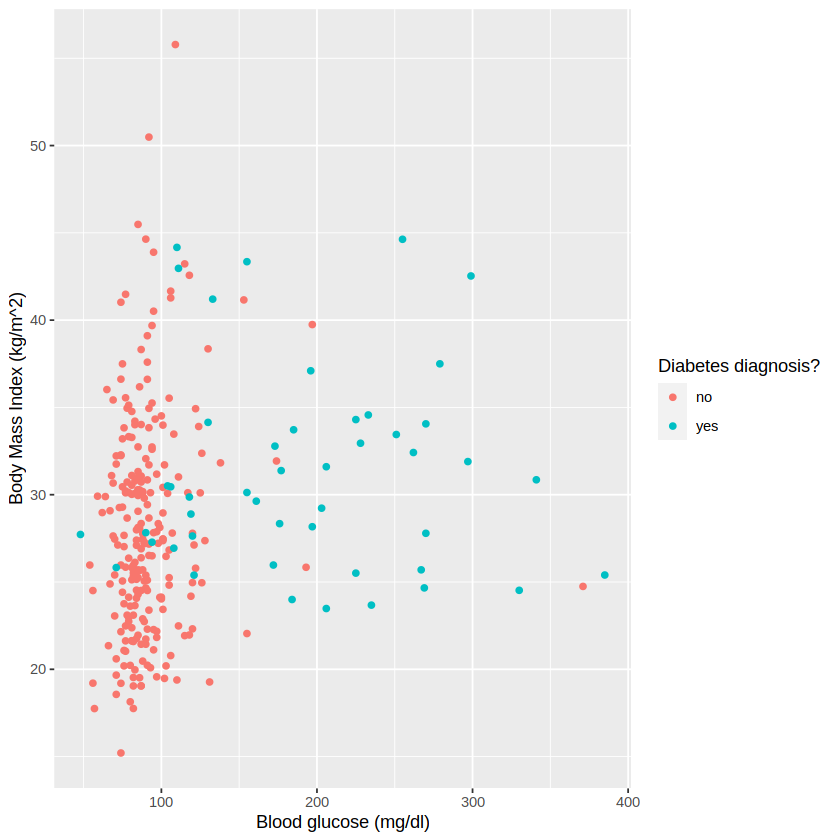

In [10]:
train_plot <- train_data |>
    ggplot(aes(x = stab.glu, y = BMI, colour = diagnosis)) +
    geom_point() +
    labs(x = "Blood glucose (mg/dl)", y = "Body Mass Index (kg/m^2)", colour = "Diabetes diagnosis?") 
train_plot

The scatterplot shows that blood glucose (stab.glu) is distributed on a larger scale, meaning it will have greater effect on our k-NN model. To counter this, we will standardize the predictors in our training data!